# News sources embeddings

Now we have the embeddings for the news sources, let's see what we can use them for

In [15]:
import numpy as np
import json
import plotly.express as px

from sklearn.decomposition import PCA 

In [16]:
# read the embeddings 
ns_embedding = np.load("w_Item.npy")

In [17]:
ns_embedding

array([[-0.00667334,  0.03982804,  0.02142049, ...,  0.02484458,
        -0.05396631, -0.00262325],
       [ 0.02993197,  0.02474083,  0.06281775, ..., -0.02655037,
         0.01898521, -0.03358972],
       [-0.00156025, -0.02370224, -0.04688628, ...,  0.02609926,
         0.00206885, -0.01387204],
       ...,
       [-0.03921328,  0.10790069, -0.01159416, ...,  0.06476848,
        -0.02872327, -0.15029373],
       [ 0.01044964,  0.06109123,  0.09625666, ...,  0.03459237,
        -0.1294363 ,  0.05773045],
       [ 0.07999245,  0.0876896 , -0.03920512, ...,  0.1514788 ,
         0.13007279, -0.11886488]])

we read in the names of the news sources 

In [18]:
ns_dict = json.load(open("data/new_id_ns5.json"))

In [19]:
newssources = [ns_dict[str(i)] for i in range(len(ns_embedding))]

In [20]:
len(ns_dict) == len(ns_embedding)

True

Now we can do PCA to reduce dimension into two and visualize 

In [21]:
pca2 = PCA(n_components = 2)
ns2 = pca2.fit_transform(ns_embedding)

In [22]:
pca3 = PCA(n_components = 3)
ns3 = pca3.fit_transform(ns_embedding)

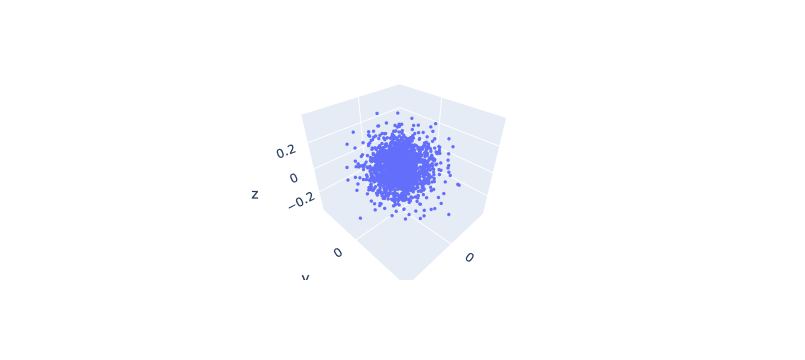

In [23]:
fig = px.scatter_3d(x=[ns[0] for ns in ns3], y=[ns[1] for ns in ns3], z=[ns[2] for ns in ns3], 
                hover_name=newssources)
fig.update_traces(marker_size=2)
fig.show()

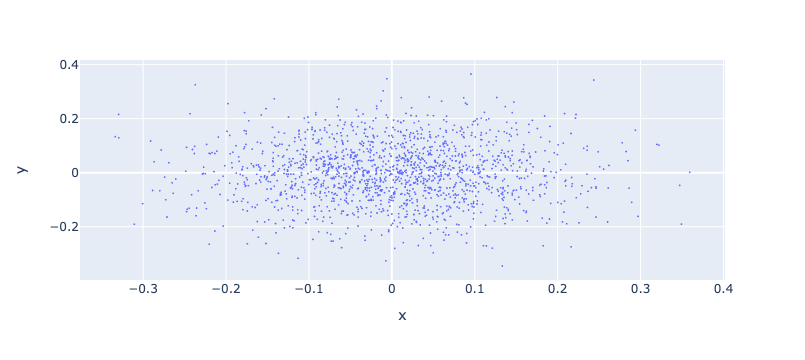

In [24]:
fig = px.scatter(x=[ns[0] for ns in ns2], y=[ns[1] for ns in ns2], 
                hover_name=newssources)
fig.update_traces(marker_size=2)
fig.show()

## t-SNE

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne3 = TSNE(n_components=3, learning_rate='auto', 
             init='random', perplexity=3).fit_transform(ns_embedding)

In [30]:
reliability = json.load(open("reliability.json", "r"))

In [32]:
reliability["breitbart.com"]

'unreliable'

In [31]:
len(set(reliability.keys()) & set(newssources))

740

In [41]:
reliability_color = []

for ns in newssources:
    if ns not in reliability:
        reliability_color.append("white")
    elif reliability[ns] == "unreliable":
        reliability_color.append("red")
    elif reliability[ns] == "reliable":
        reliability_color.append("green")

In [42]:
fig = px.scatter_3d(x=[ns[0] for ns in tsne3], y=[ns[1] for ns in tsne3], z=[ns[2] for ns in tsne3],  
                hover_name=newssources, color=reliability_color, 
                color_discrete_map="identity")
fig.update_traces(marker_size=2)
fig.update_layout(width=800, height=600)
fig.show()